# Disputed Author Project (dap)

In [56]:
import pandas as pd
import numpy as np

In [57]:
import os

authors = '/Users/thughes/Dropbox/Code/disputed_authors/Classics/'

dataset = pd.DataFrame(columns=['meta_author', 'meta_title', 'meta_body'])

for author in os.listdir(authors):
    if author == '.DS_Store':
        continue
    for doc in os.listdir(authors+author):
        print "Adding", author, doc
        f = open(authors+author+"/"+doc)
        s = f.read()
        f.close
        
        dp = {
            'meta_author': author,
            'meta_title': doc,
            'meta_body': s
        }
        
        dataset = dataset.append(dp, ignore_index=True)
        


Adding Aristotle Economics_I
Adding Aristotle Economics_II
Adding Aristotle Ethica_Eudemia_I
Adding Aristotle Ethica_Eudemia_II
Adding Aristotle Ethica_Eudemia_III
Adding Aristotle Ethica_Eudemia_IV
Adding Aristotle Ethica_Eudemia_V
Adding Aristotle Metaphysics_I
Adding Aristotle Metaphysics_II
Adding Aristotle Metaphysics_III
Adding Aristotle Metaphysics_IV
Adding Aristotle Metaphysics_IX
Adding Aristotle Metaphysics_V
Adding Aristotle Metaphysics_VI
Adding Aristotle Metaphysics_VII
Adding Aristotle Metaphysics_VIII
Adding Aristotle Metaphysics_X
Adding Aristotle Metaphysics_XI
Adding Aristotle Metaphysics_XII
Adding Aristotle Metaphysics_XIII
Adding Aristotle Metaphysics_XIV
Adding Aristotle Nico_Ethics_I
Adding Aristotle Nico_Ethics_II
Adding Aristotle Nico_Ethics_III
Adding Aristotle Nico_Ethics_IV
Adding Aristotle Nico_Ethics_IX
Adding Aristotle Nico_Ethics_V
Adding Aristotle Nico_Ethics_VI
Adding Aristotle Nico_Ethics_VII
Adding Aristotle Nico_Ethics_VIII
Adding Aristotle Nico_Et

In [58]:
# Convert the text into tf_idf values
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()

tf_idf_vec = vec.fit_transform(dataset['meta_body'])

In [59]:
# Convert the tf_idf matrix into a data frame with labels
tf_idf_df = pd.DataFrame(columns=vec.get_feature_names(), data=tf_idf_vec.toarray())

In [60]:
# Combine the original data set with the tf_idf dataframe
cluster_df = dataset.join(tf_idf_df).drop('meta_body', 1)

In [61]:
#cluster_df = cluster_df.set_index('meta_title')

In [62]:
# These are our final data sets.  y is author, X contains the text data
y_set = cluster_df['meta_author']

In [63]:
X_set = cluster_df

In [64]:
# Naive way to graph a cluster is just reduce the dimensions to 2 with PCA
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(n_components=2)
pca.fit(X_set.drop(['meta_author', 'meta_title'], 1))
plato_pca_plotdata = pca.transform(X_set.loc[X_set['meta_author'] == 'Plato'].drop(['meta_author', 'meta_title'], 1))
aristotle_pca_plotdata = pca.transform(X_set.loc[X_set['meta_author'] == 'Aristotle'].drop(['meta_author', 'meta_title'], 1))
xenophon_pca_plotdata = pca.transform(X_set.loc[X_set['meta_author'] == 'Xenophon'].drop(['meta_author', 'meta_title'], 1))
thucydides_pca_plotdata = pca.transform(X_set.loc[X_set['meta_author'] == 'Thucydides'].drop(['meta_author', 'meta_title'], 1))

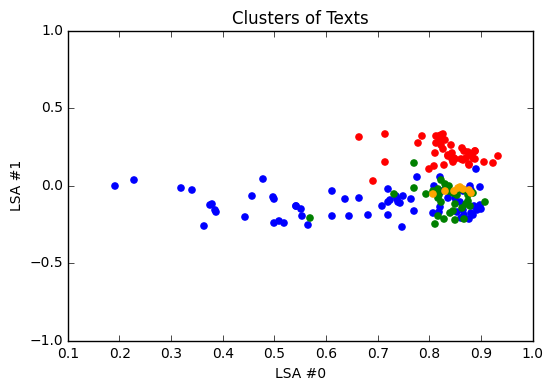

In [66]:
# Graph the results on a 2D plane
import matplotlib.pyplot as plt
import random

%matplotlib inline

#plt.figure(figsize=(100,100))
plt.ylabel('LSA #1')
plt.xlabel('LSA #0')
plt.ylim(ymin=-1, ymax=1)
plt.title('Clusters of Texts')
plt.scatter(plato_pca_plotdata[:,0], plato_pca_plotdata[:,1], color='blue')
plt.scatter(aristotle_pca_plotdata[:,0], aristotle_pca_plotdata[:,1], color='red')
plt.scatter(xenophon_pca_plotdata[:,0], xenophon_pca_plotdata[:,1], color='green')
plt.scatter(thucydides_pca_plotdata[:,0], thucydides_pca_plotdata[:,1], color='orange')



#titles = X_set.loc[X_set['meta_author'] == 'Plato']['meta_title']

#for label, x, y in zip(titles, plato_pca_plotdata[:, 0], plato_pca_plotdata[:, 1]):
#    plt.annotate(
#        label, 
#        xy = (x, y), xytext = (random.choice([-20, 20]), random.choice([-20, 20])),
#        textcoords = 'offset points', ha = 'right', va = 'bottom',
#        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
#        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    


plt.show()